## Bài 1

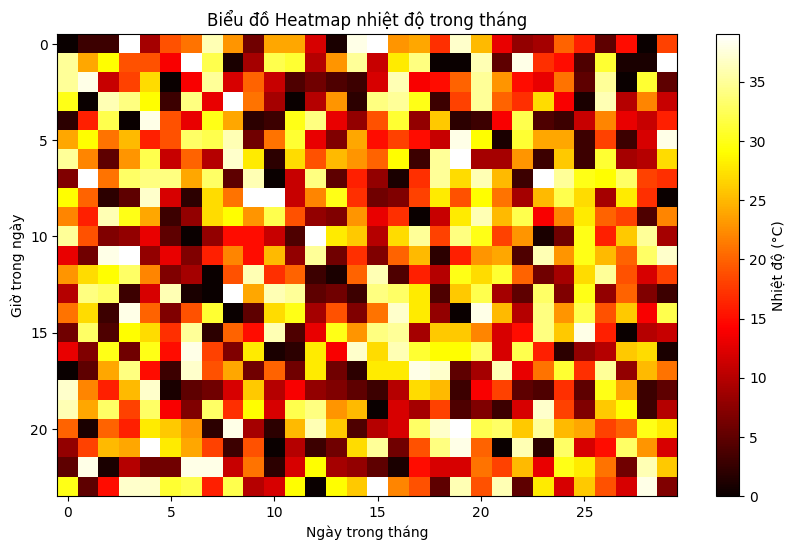

In [1]:
import matplotlib.pyplot as plt 
import numpy as np

np.random.seed(0)
# Ma trận 24x38, mỗi hàng là một giờ trong ngày, mỗi cột là một ngày trong tháng 
data = np.random.randint(0, 40, size=(24, 30))
# Tạo biểu đồ heatmap
plt.figure(figsize=(10, 6)) 
plt.imshow(data, aspect='auto', cmap='hot', interpolation='nearest')
plt.colorbar(label='Nhiệt độ (°C)')
# Đặt tên cho trục và tiêu đề 
plt.xlabel('Ngày trong tháng')
plt.ylabel('Giờ trong ngày')
plt.title('Biểu đồ Heatmap nhiệt độ trong tháng')
plt.show()

## Bài 2

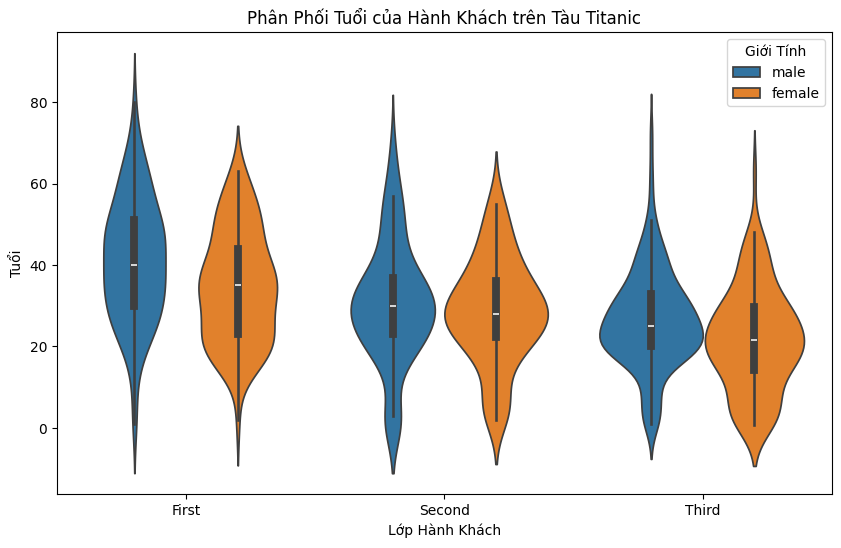

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt
# Load dữ liệu Titanic từ seaborn 
titanic_data = sns. load_dataset('titanic')
# Loại bỏ các giá trị thiếu trong cột 'age' 
titanic_data = titanic_data.dropna (subset=['age'])
# Tạo biểu đồ violin 
plt.figure(figsize=(10, 6)) 
sns.violinplot(x='class', y='age', hue='sex', data=titanic_data)
plt.title( 'Phân Phối Tuổi của Hành Khách trên Tàu Titanic')
plt.xlabel('Lớp Hành Khách')
plt.ylabel('Tuổi')
plt.legend(title='Giới Tính')
plt.show()

print(titanic_data)

In [20]:

import plotly.offline as pyo 
import plotly.graph_objects as go 
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/violin_data.csv") 
fig = go. Figure()
fig.add_trace(go.Violin(x=df['day'][ df['smoker'] == 'Yes' ],
                        y=df['total_bill'][ df['smoker'] == 'Yes' ]
                        ,legendgroup='Yes', scalegroup='Yes', name='Yes'
                        ,side='negative',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=df['day'][ df['smoker'] =='No' ],
                        y=df['total_bill'][ df['smoker']=='No' ],
                        legendgroup='No', scalegroup='No', name='No', 
                        side='positive',
                        line_color='orange')
            )
fig.update_traces (meanline_visible=True)
fig.update_layout(violingap=0, violinmode='overlay')
pyo.plot(fig)


'temp-plot.html'

In [15]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/violin_data.csv")

fig = go.Figure()

days = ['Thur', 'Fri', 'Sat', 'Sun']

for day in days:
    fig.add_trace(go.Violin(x=df['day'][df['day'] == day],
                            y=df['total_bill'][df['day'] == day],
                            name=day,
                            box_visible=True,
                            meanline_visible=True))

fig.show()

## Bài 3

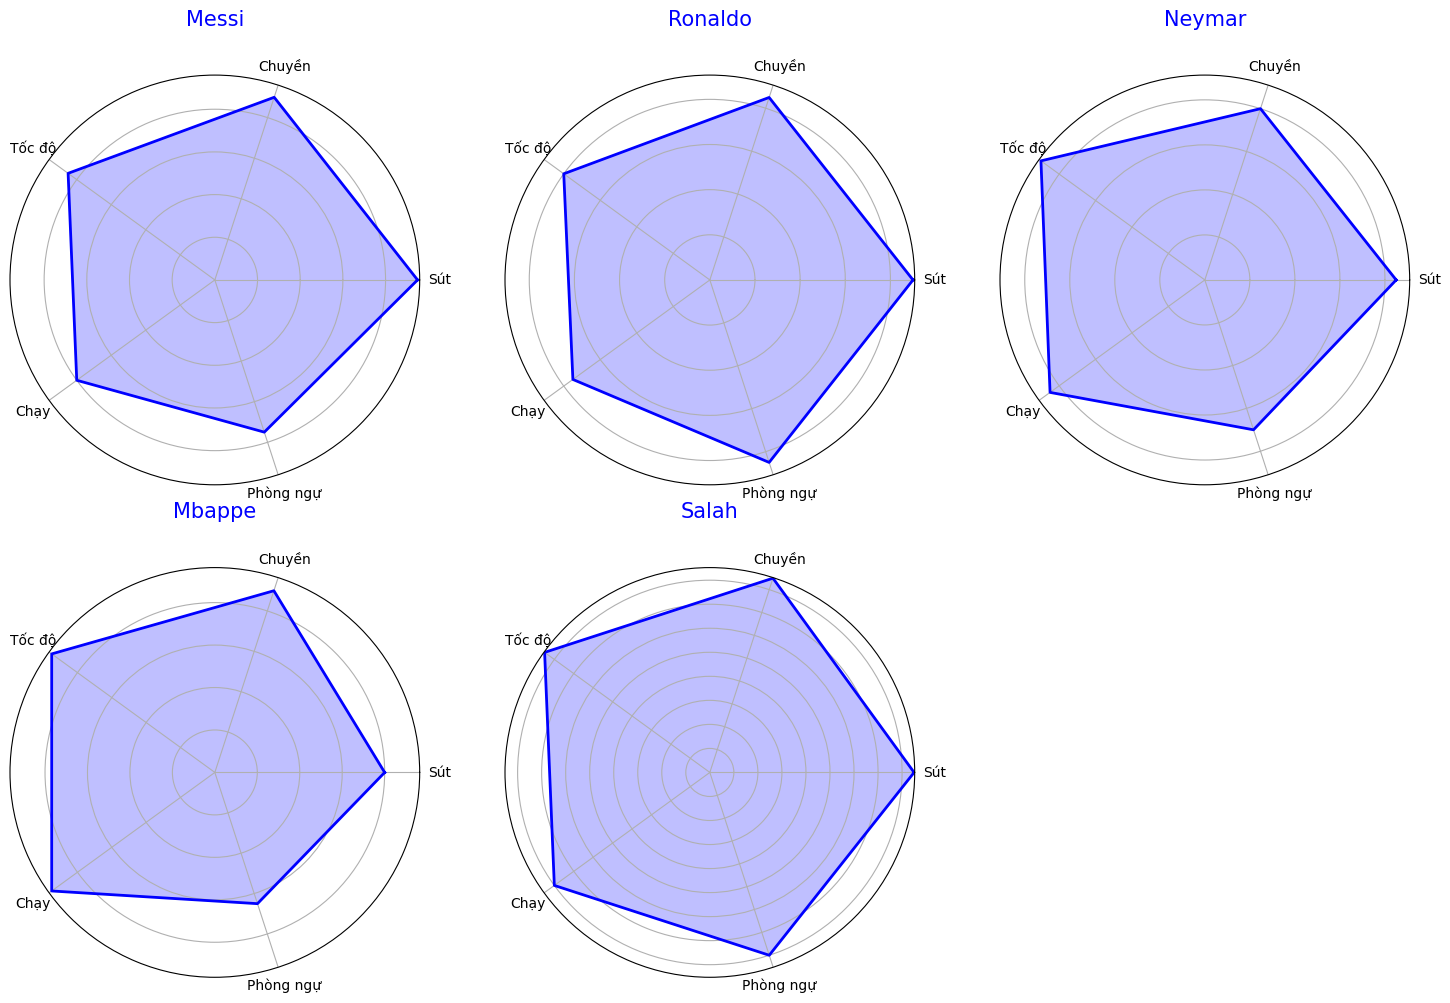

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu ví dụ về kỹ năng của các cầu thủ
players = ['Messi', 'Ronaldo', 'Neymar', 'Mbappe', 'Salah']
skills = ['Sút', 'Chuyền', 'Tốc độ', 'Chạy', 'Phòng ngự']
# Điểm số kỹ năng của từng cầu thủ
scores = np.array([[95, 90, 85, 80, 75],  # Messi
                   [90, 85, 80, 75, 85],  # Ronaldo
                   [85, 80, 90, 85, 70],  # Neymar
                   [80, 90, 95, 95, 65],  # Mbappe
                   [85, 85, 85, 80, 80]]) # Salah

# Tạo biểu đồ radar subplot
fig, axs = plt.subplots(2, 3, figsize=(15, 10), subplot_kw=dict(polar=True))
axs = axs.ravel()

# Tính toán góc cho mỗi chỉ số kỹ năng
angles = np.linspace(0, 2 * np.pi, len(skills), endpoint=False).tolist()
angles += angles[:1]  # Đóng vòng tròn

for i in range(len(players)):
    ax = axs[i]
    
    # Thêm điểm số của cầu thủ hiện tại
    player_scores = scores[i].tolist()
    player_scores += player_scores[:1]  # Đóng vòng tròn

    ax.fill(angles, player_scores, color='b', alpha=0.25)
    ax.plot(angles, player_scores, color='b', linewidth=2)
    
    # Đặt các nhãn kỹ năng và tên cầu thủ
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(skills)
    ax.set_title(players[i], size=15, color='b', y=1.1)

# Ẩn subplot không sử dụng
fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


In [5]:
import plotly.graph_objs as go
import plotly.offline as pyo

teams = ['Team A', 'Team B', 'Team C']
categories =['Attack', 'Defense', 'Midfield']
values_team_A = [8, 7, 6]
values_team_B = [7, 6, 7]
values_team_C = [6, 8, 5]
# Tạo radar chart cho từng đội
team_A = go.Scatterpolar(
    r=values_team_A,
    theta=categories,
    fill='toself',
    name='Team A'  )

team_B = go.Scatterpolar(
    r=values_team_B,
    theta=categories,
    fill='toself',
    name='Team B')

team_C = go. Scatterpolar(
    r=values_team_C,
    theta=categories,
    fill='toself',
    name='Team C')


# Tạo layout
layout = go.Layout(
    title='Performance Comparison of Teams',
    polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 10] # Đặt phạm vi của trục radial
            )
    )
)
# Tạo figure
fig =go.Figure(data=[team_A, team_B, team_C],layout=layout)
# Hiển thị biểu đồ
pyo.plot(fig,filename='radar_chart.html')

In [4]:
import plotly.graph_objs as go
import plotly.offline as pyo
import numpy as np

players = ['Messi', 'Ronaldo', 'Neymar', 'Mbappe', 'Salah']
skills = ['Sút', 'Chuyền', 'Tốc độ', 'Chạy', 'Phòng ngự']
scores = np.array([[95, 90, 85, 80, 75],
                   [90, 85, 80, 75, 85],
                   [85, 80, 90, 85, 70],
                   [80, 90, 95, 95, 65],
                   [85, 85, 85, 80, 80]])

# Tạo radar chart cho từng cầu thủ
data = []
for i in range(len(players)):
    player = go.Scatterpolar(
        r=scores[i],
        theta=skills,
        fill='toself',
        name=players[i]
    )
    data.append(player)

layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )
    ),
    showlegend=True
)

fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)